In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:

input_train = '../input/titanic/train.csv'
input_test = '../input/titanic/test.csv'

train = pd.read_csv(input_train)
test = pd.read_csv(input_test)

passengerId = test['PassengerId']


train.drop(labels='PassengerId', axis=1, inplace=True)
test.drop(labels='PassengerId', axis=1, inplace=True)

In [3]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

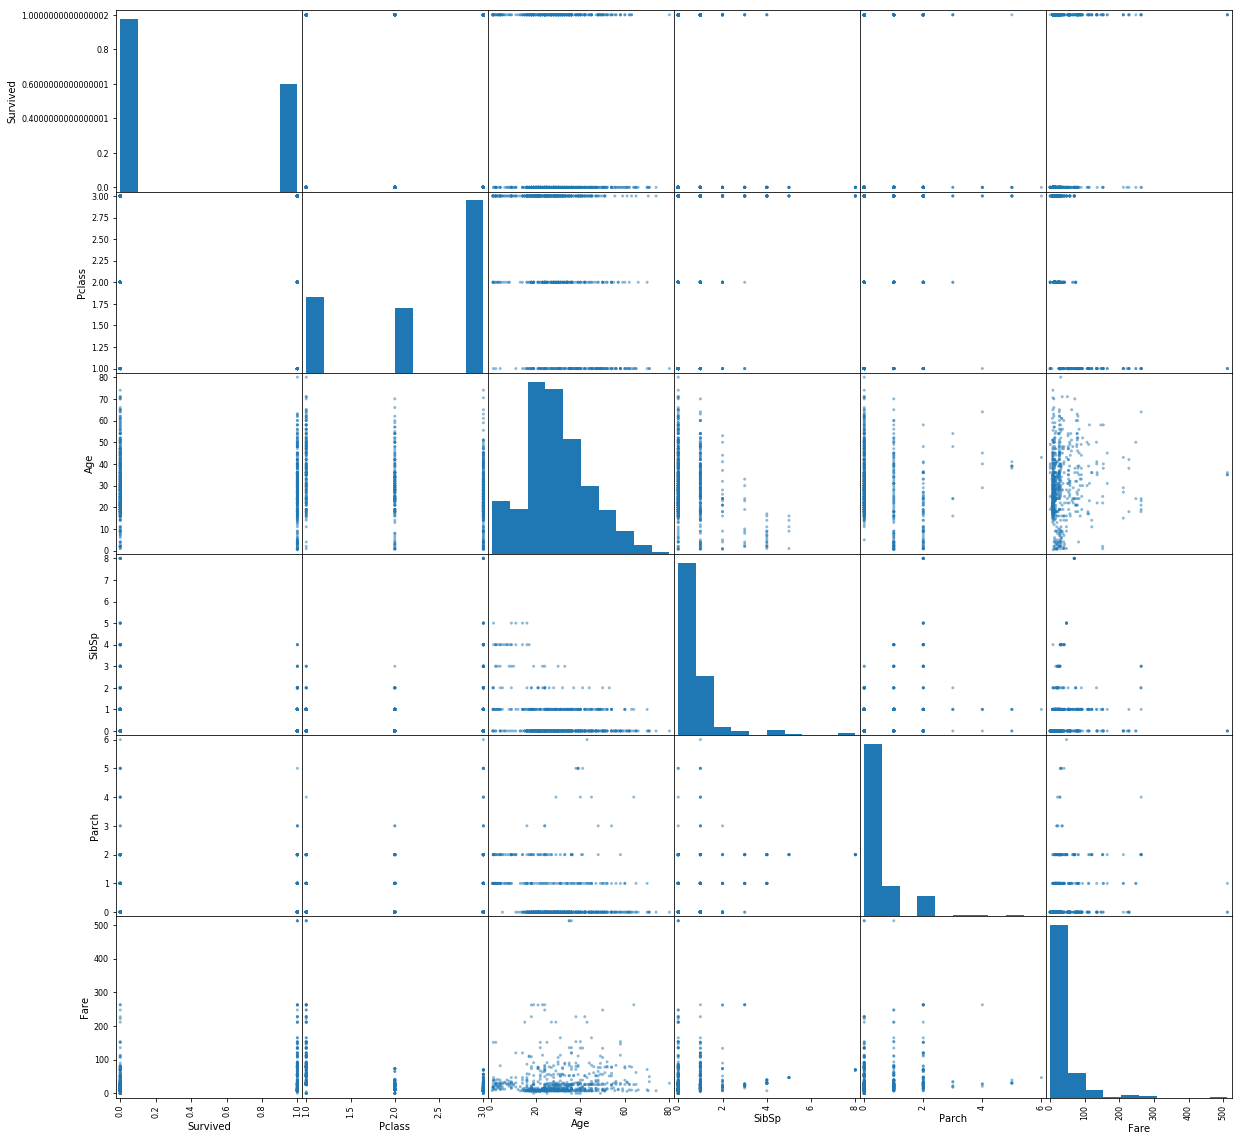

In [5]:
import pandas
from pandas.plotting import scatter_matrix

scatter_matrix(train, alpha=0.5, figsize=(20, 20))
plt.show()

[]

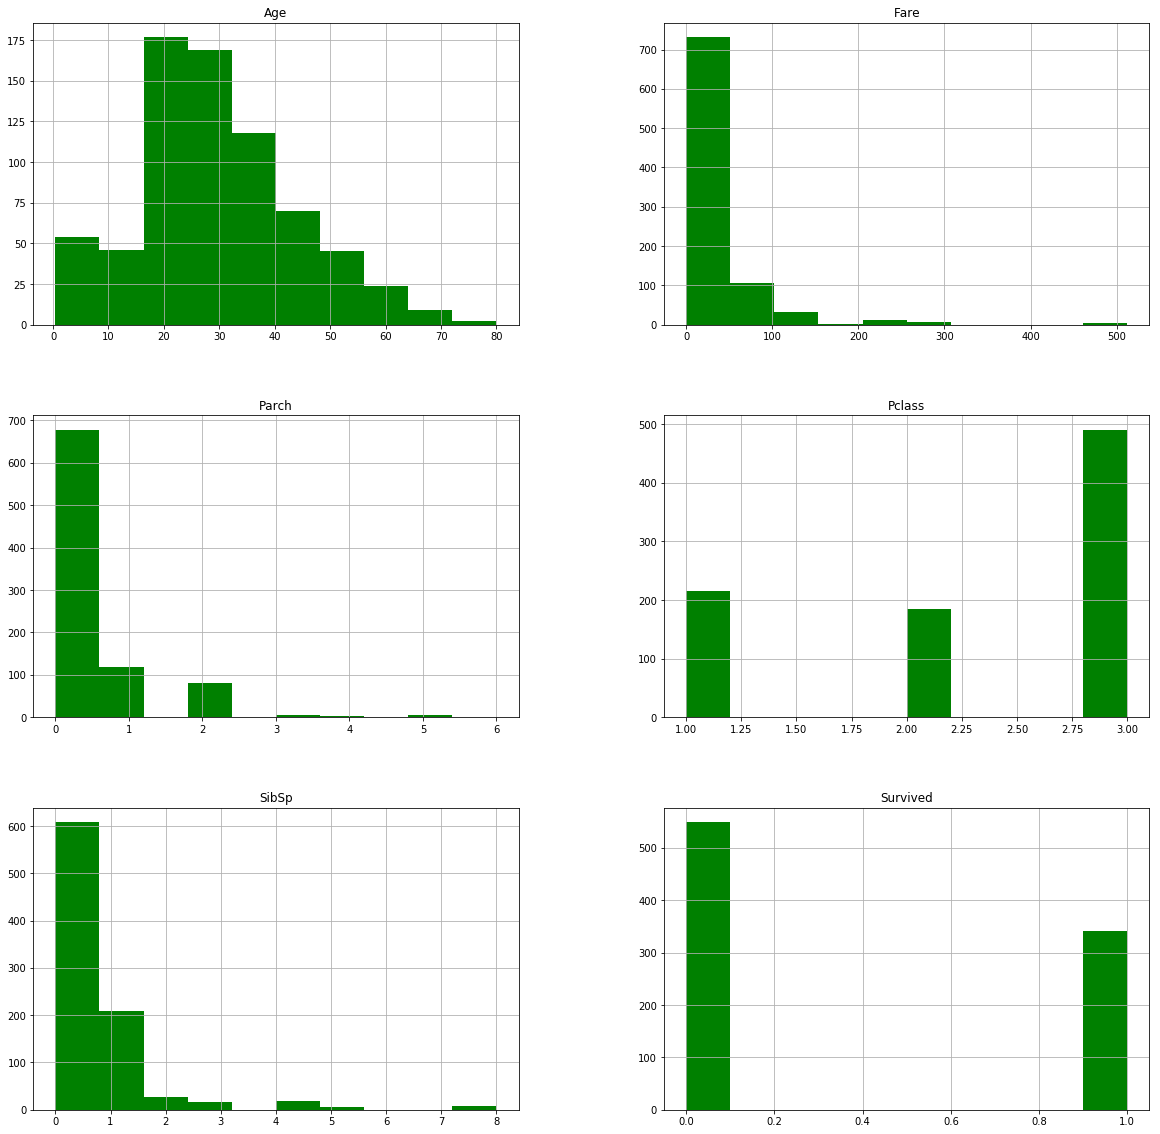

In [6]:
train.hist(figsize=(20, 20), color='green')
plt.plot()

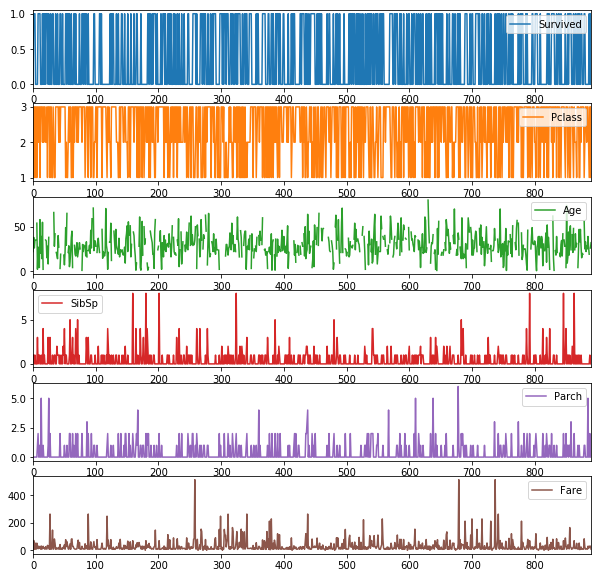

In [7]:
train.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

In [8]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

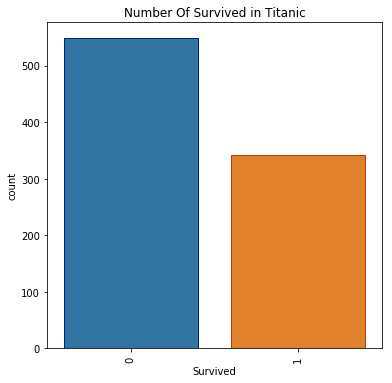

In [11]:
plt.subplots(figsize=(6,6))
sns.countplot('Survived', data=train,edgecolor=sns.color_palette('dark',5))
plt.xticks(rotation=90)
plt.title('Number Of Survived in Titanic')
plt.show()

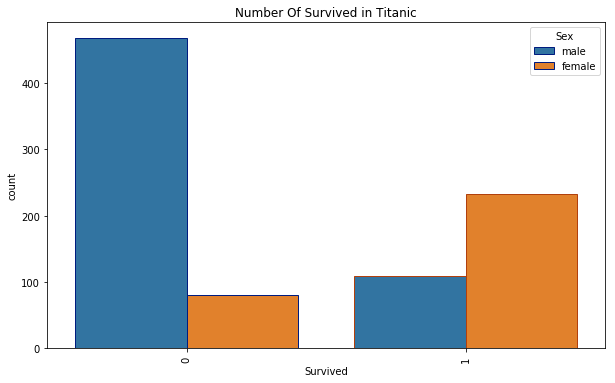

In [12]:
plt.subplots(figsize=(10,6))
sns.countplot('Survived', hue='Sex',data=train,edgecolor=sns.color_palette('dark',5))
plt.xticks(rotation=90)
plt.title('Number Of Survived in Titanic')
plt.show()

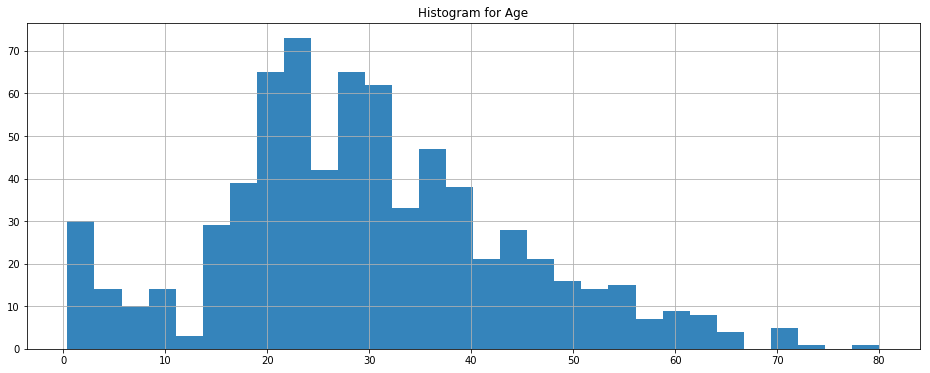

In [13]:
onlyAge = train['Age']
plt.subplots(figsize=(16,6))
onlyAge.hist(bins=30,alpha=0.9)
plt.title('Histogram for Age')
plt.show()

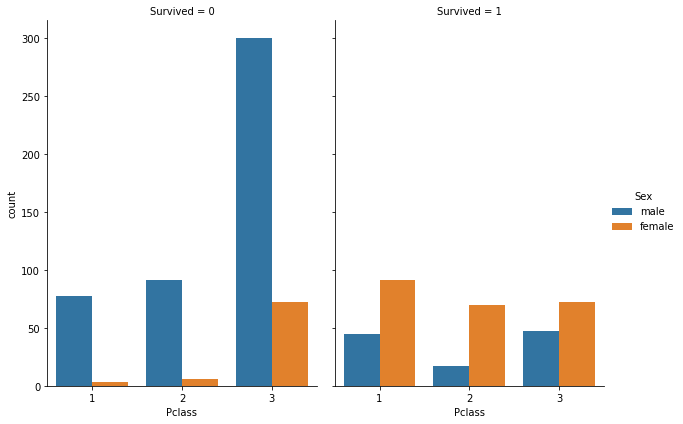

In [14]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train, kind="count", height=6, aspect=.7)

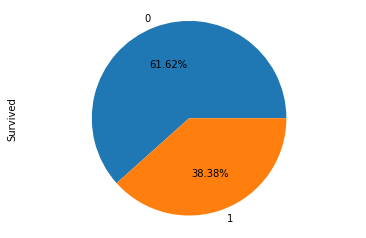

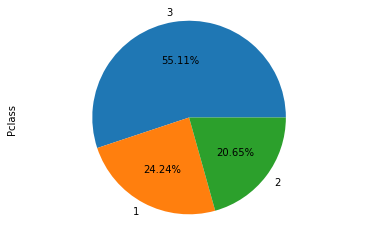

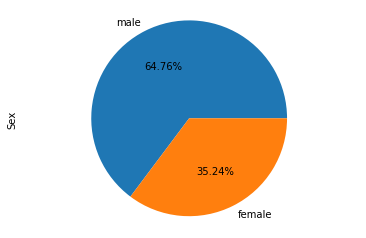

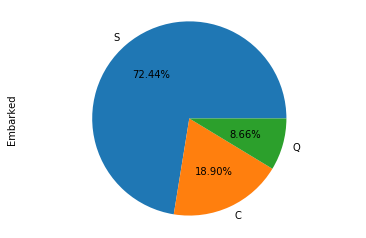

In [15]:
train.Survived.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

train.Pclass.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

train.Sex.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

train.Embarked.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.show()

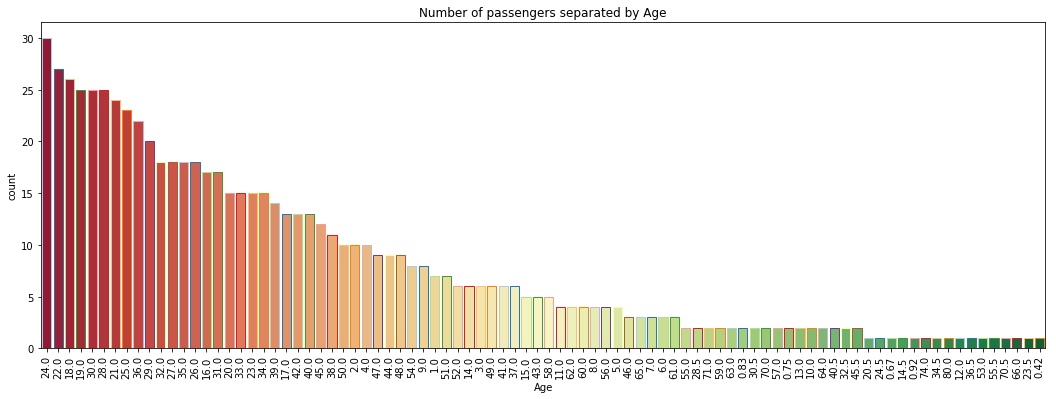

In [16]:
plt.subplots(figsize=(18,6))
sns.countplot('Age',data=train,palette='RdYlGn',edgecolor=sns.color_palette('Paired',20),order=train['Age'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of passengers separated by Age')
plt.show()

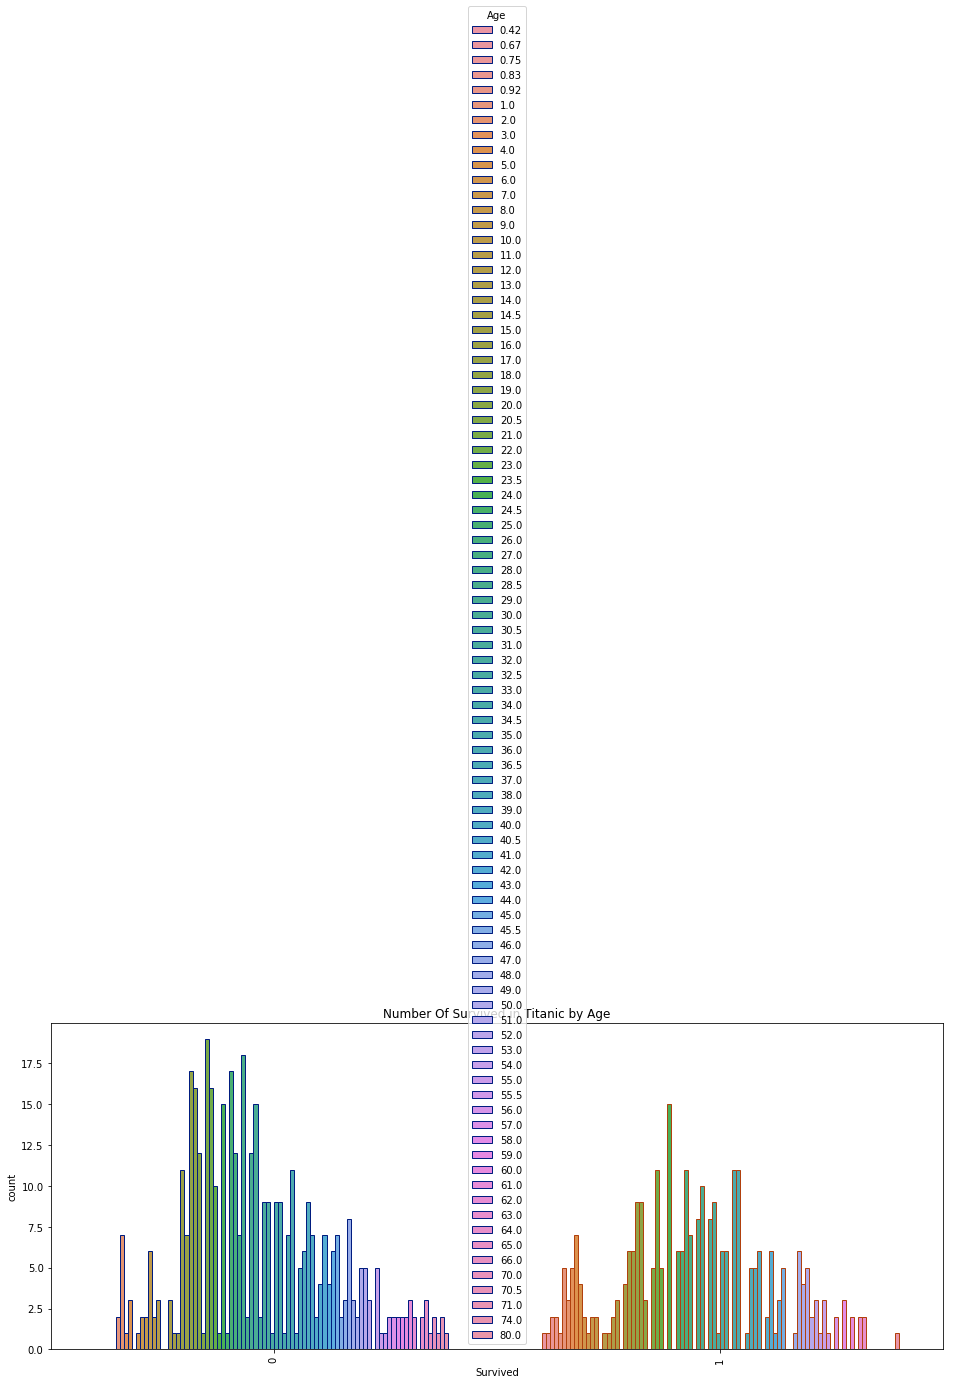

In [17]:
plt.subplots(figsize=(16,6))
sns.countplot('Survived', hue='Age',data=train,edgecolor=sns.color_palette('dark',5))
plt.xticks(rotation=90)
plt.title('Number Of Survived in Titanic by Age')
plt.show()

Text(0.5, 1.0, 'Relationship between age, sex and survivors')

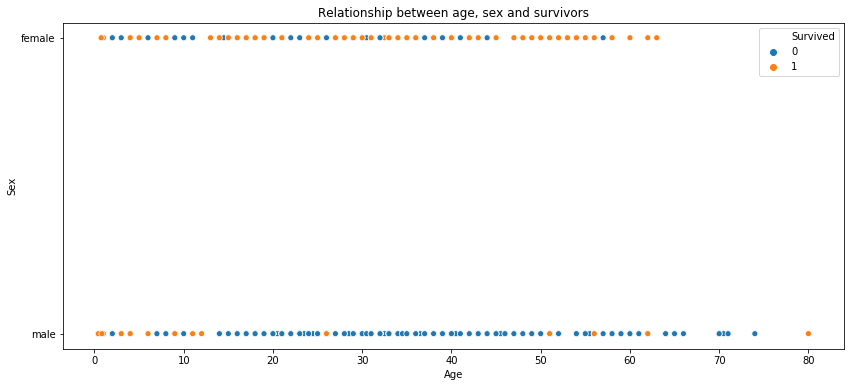

In [18]:
plt.subplots(figsize=(14,6))
sns.scatterplot(x="Age", y="Sex", hue="Survived", data=train)
plt.title("Relationship between age, sex and survivors")

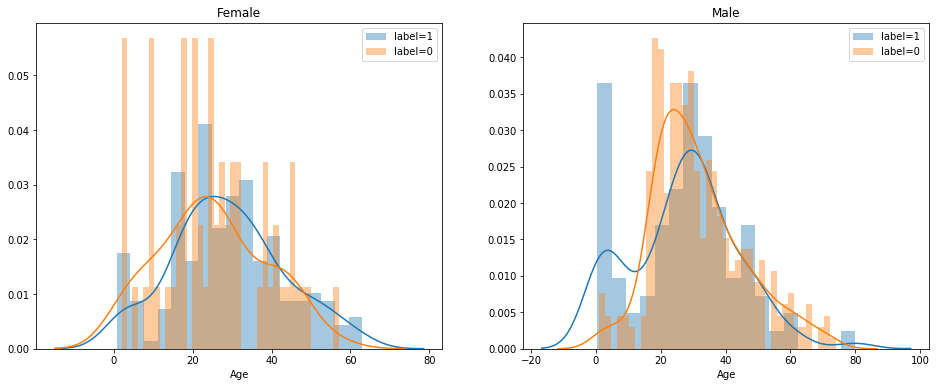

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
w = train[train['Sex']=='female']
m = train[train['Sex']=='male']

ax = sns.distplot(w[w['Survived']==1].Age.dropna(), bins=18, label ='label=1',ax = axes[0])
ax = sns.distplot(w[w['Survived']==0].Age.dropna(), bins=40, label ='label=0', ax = axes[0])
ax.legend()
ax.set_title('Female')

ax = sns.distplot(m[m['Survived']==1].Age.dropna(), bins=18, label = 'label=1', ax = axes[1])
ax = sns.distplot(m[m['Survived']==0].Age.dropna(), bins=40, label = 'label=0', ax = axes[1])
ax.legend()
ax = ax.set_title('Male')

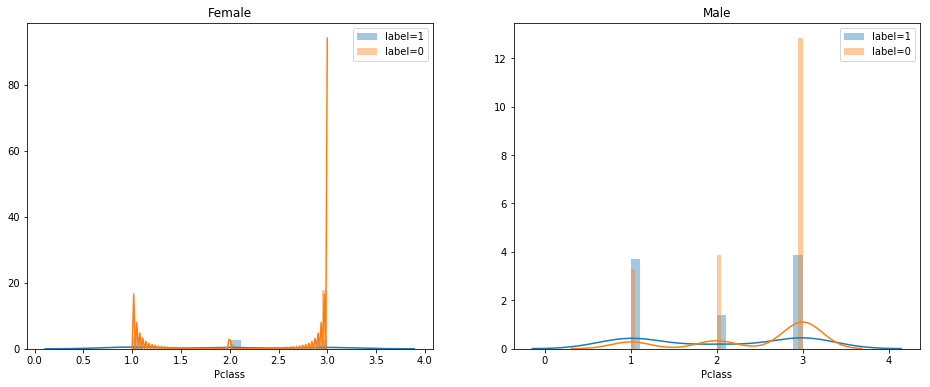

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
w = train[train['Sex']=='female']
m = train[train['Sex']=='male']

ax = sns.distplot(w[w['Survived']==1].Pclass.dropna(), bins=18, label ='label=1',ax = axes[0])
ax = sns.distplot(w[w['Survived']==0].Pclass.dropna(), bins=40, label ='label=0',ax = axes[0])
ax.legend()
ax.set_title('Female')

ax = sns.distplot(m[m['Survived']==1].Pclass.dropna(), bins=18, label = 'label=1',ax = axes[1])
ax = sns.distplot(m[m['Survived']==0].Pclass.dropna(), bins=40, label = 'label=0',ax = axes[1])
ax.legend()
ax = ax.set_title('Male')

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


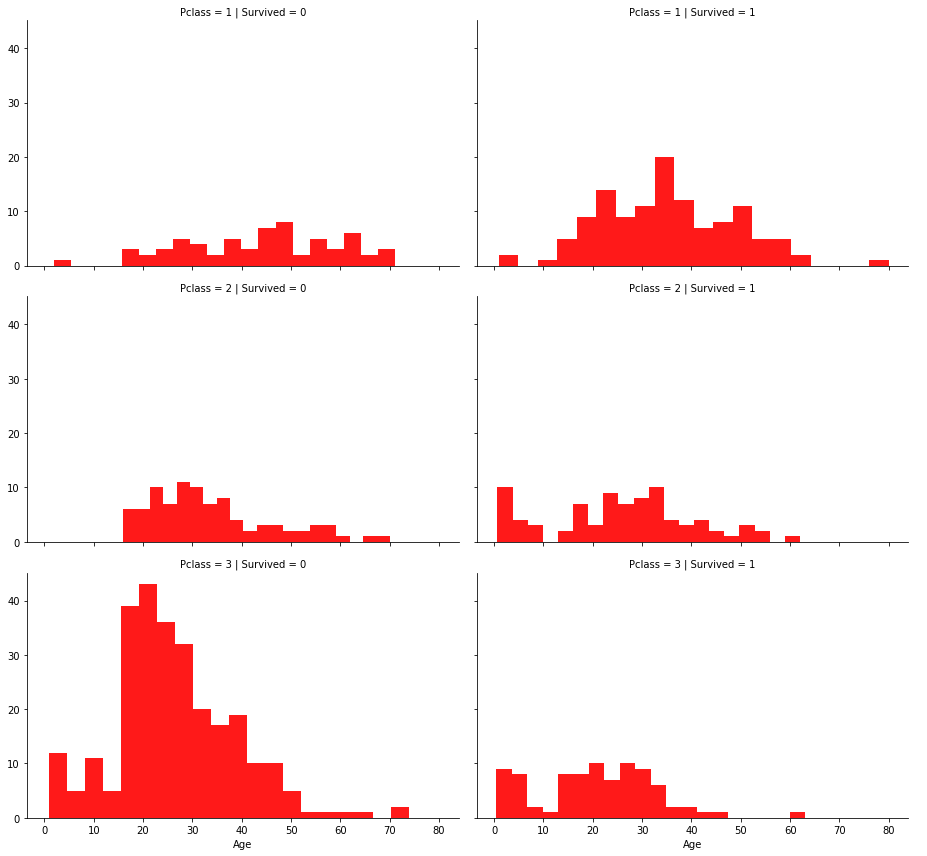

In [21]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=4, aspect=1.6)
grid.map(plt.hist,'Age', alpha=0.9, bins=20, color='red')
grid.add_legend();

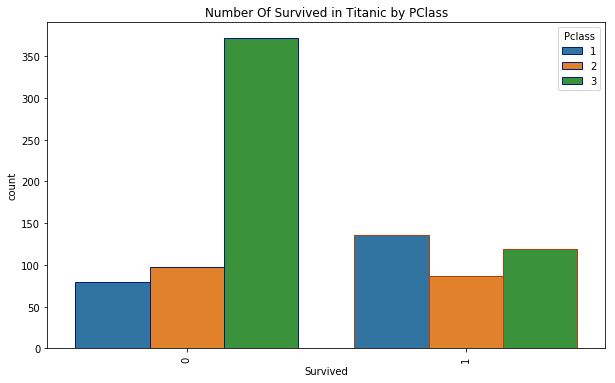

In [22]:
plt.subplots(figsize=(10,6))
sns.countplot('Survived', hue='Pclass',data=train, edgecolor=sns.color_palette('dark',5))
plt.xticks(rotation=90)
plt.title('Number Of Survived in Titanic by PClass')
plt.show()

In [23]:
train['Sex'] = train['Sex'].map({"male":0,"female":1})
test['Sex'] = test['Sex'].map({"male":0,"female":1})
train['Embarked'] = train['Embarked'].map({"S":0,"C":1,"Q":2})
test['Embarked'] = test['Embarked'].map({"S":0,"C":1,"Q":2})

def deleteTag(train, test):
    delete = ['Name', 'Ticket', 'Cabin']
    for name in delete:
        train = train.drop([name], axis=1)
        test = test.drop([name], axis=1)
        
    return [train, test]

train, test = deleteTag(train, test)

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

X = train.iloc[:, 1:12].values
y = train.iloc[:, 0].values

s = LabelEncoder()
t = LabelEncoder()
e = LabelEncoder()
X[:, 1] = s.fit_transform(X[:, 1])
X[:, 5] = t.fit_transform(X[:, 5])
X[:, 4] = e.fit_transform(X[:, 4])

print(X)

X = imp.fit_transform(X)

[[  3.   0.  22. ...   0.  18.   0.]
 [  1.   1.  38. ...   0. 207.   1.]
 [  3.   1.  26. ...   0.  41.   0.]
 ...
 [  3.   1.  nan ...   2. 131.   0.]
 [  1.   0.  26. ...   0. 153.   1.]
 [  3.   0.  32. ...   0.  30.   2.]]


In [24]:
test = imp.fit_transform(test)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17)

In [26]:
X_train

array([[  1.,   0.,  19., ...,   2., 246.,   0.],
       [  3.,   0.,  51., ...,   0.,  43.,   0.],
       [  2.,   0.,   1., ...,   1., 172.,   0.],
       ...,
       [  3.,   0.,  29., ...,   0.,  40.,   1.],
       [  3.,   0.,  48., ...,   0.,  36.,   0.],
       [  3.,   0.,  34., ...,   1.,  93.,   0.]])

In [27]:
RandomForest = RandomForestClassifier(n_estimators=20, criterion='entropy')
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
print(test)

[[ 3.          0.         34.5        ...  0.          7.8292
   2.        ]
 [ 3.          1.         47.         ...  0.          7.
   0.        ]
 [ 2.          0.         62.         ...  0.          9.6875
   2.        ]
 ...
 [ 3.          0.         38.5        ...  0.          7.25
   0.        ]
 [ 3.          0.         30.27259036 ...  0.          8.05
   0.        ]
 [ 3.          0.         30.27259036 ...  1.         22.3583
   1.        ]]


In [29]:
prediction = RandomForest.predict(test)
print(prediction)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 1 0 1 0 0 0]


In [30]:
print(len(prediction))

418


In [31]:
Kagglesubmission = pd.DataFrame({'PassengerId': passengerId, 'Survived': prediction})

In [32]:
Kagglesubmission.to_csv('rdmf_Titanic.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 